In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import math
%matplotlib inline 

In [22]:
def plot_throughput_cdf(fr1_df, fr2_df, filename='/datasets/grid'):
    
    columns = ['dl_adj_thp', 'ul_adj_thp']
    titles = ['DL Throughput', 'UL Throughput']
    
    fig, axs = plt.subplots(int(len(columns)/2), 2, figsize=(16,7))
    axs = axs.reshape(-1)
    for (index, col) in enumerate(columns):
        data_df = fr1_df[[col]].rename(columns={col: 'FReUse=1'})
        data_df = pd.concat([data_df, fr2_df[[col]].rename(columns={col: 'FReUse=2'})], axis=1)
        axs[index].title.set_text(titles[index])
        axs[index].set(ylabel='CDF')
        axs[index].set(xlabel='Mbps')
        sn.ecdfplot(data=data_df, ax=axs[index])
        axs[index].grid()
    
    plt.savefig(filename + '_thrupt.png')
    plt.show()

In [28]:
directory = "datasets/earfcn/cost231"

num_ues = 25

fr1_df = pd.read_csv(directory + '/fr1_321_analysis.csv')
fr2_df = pd.read_csv(directory + '/fr2_321_analysis.csv')

# Assume 2 20Mhz channels for fr1, adjust throughput, scale by 25 UEs
fr1_df['dl_adj_thp'] = fr1_df['dl_thp'] * 2.0 * num_ues
fr1_df['ul_adj_thp'] = fr1_df['ul_thp'] * 2.0 * num_ues

# fr1_df['dl_adj_thp'] = fr1_df['dl_thp']
# fr1_df['ul_adj_thp'] = fr1_df['ul_thp']

# Assume single 20 Mhz channel for fr 2, scale by 25 UEs
fr2_df['dl_adj_thp'] = fr2_df['dl_thp'] * num_ues
fr2_df['ul_adj_thp'] = fr2_df['ul_thp'] * num_ues

fr1_df.head()

imsi  cell_id  dl_tx  dl_crc_ok  avg_dl_size  avg_rsrp  ul_tx  ul_crc_ok  \
0   157        7     24         24       1764.0      -100    599        599   
1   532       17     23         23       1287.0      -100    599        599   
2   282       12     19         19        903.0      -102    599          0   
3   307       12     20         20       1764.0       -98    599        599   
4   332       12     20         20       3225.3       -95    599        599   

   avg_ul_size  avg_sinr  new_idx  row  col  dl_thp  ul_thp  dl_adj_thp  \
0           22       1.0        0    0    0   0.310   0.070       15.50   
1           22       1.0      375   15    0   0.217   0.070       10.85   
2            7      -1.0      125    5    0   0.125   0.000        6.25   
3           26       3.0      150    6    0   0.258   0.083       12.90   
4           32       5.0      175    7    0   0.473   0.102       23.65   

   ul_adj_thp  
0        3.50  
1        3.50  
2        0.00  
3        4.15  
4        5.10

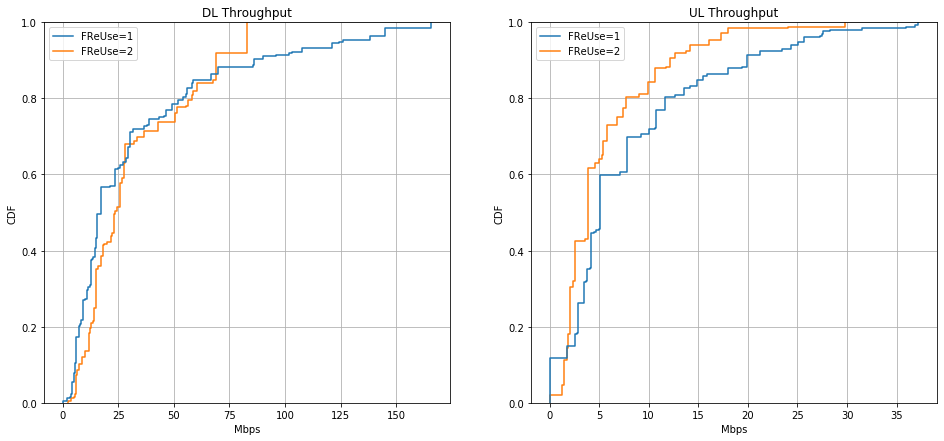

In [29]:
plot_throughput_cdf(fr1_df, fr2_df, filename=directory + '/omni_25ap_625ue')

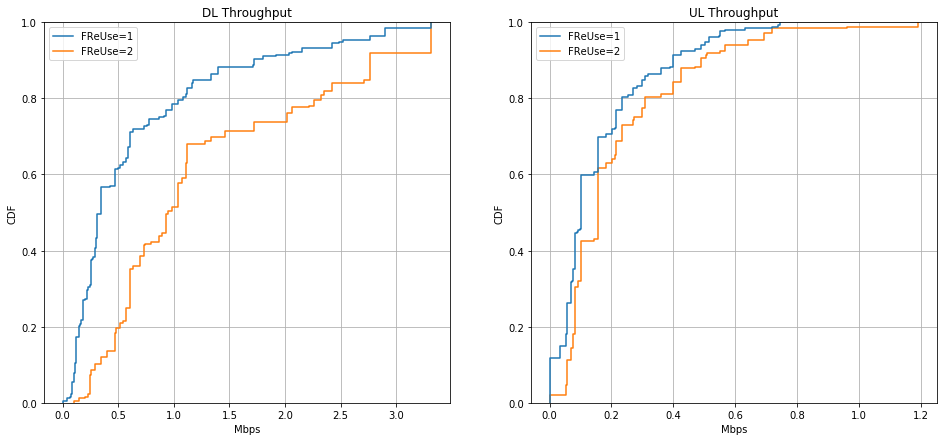

In [25]:
plot_throughput_cdf(fr1_df, fr2_df, filename=directory + '/omni_25ap_625ue')